In [134]:
import pandas as pd
import numpy as np

In [135]:
Company_stock_prices = pd.read_csv("/content/ICICIBANK.BO.csv")
Company_stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-04-29,20.363636,20.363636,20.363636,20.363636,4.913608,534143.0
1,2002-04-30,20.463634,20.463634,20.463634,20.463634,4.937736,152739.0
2,2002-05-01,20.463634,20.463634,20.463634,20.463634,4.937736,0.0
3,2002-05-02,20.354546,20.354546,20.354546,20.354546,4.911414,732357.0
4,2002-05-03,20.909090,20.909090,20.909090,20.909090,5.045221,254467.0
...,...,...,...,...,...,...,...
5371,2023-11-24,922.250000,930.599976,920.349976,929.150024,929.150024,906155.0
5372,2023-11-28,927.549988,931.450012,921.650024,926.049988,926.049988,462627.0
5373,2023-11-29,928.549988,941.150024,926.150024,939.349976,939.349976,282711.0
5374,2023-11-30,940.950012,941.049988,928.650024,935.200012,935.200012,568059.0


#### Display the first five rows of the dataset

In [136]:
Company_stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-04-29,20.363636,20.363636,20.363636,20.363636,4.913608,534143.0
1,2002-04-30,20.463634,20.463634,20.463634,20.463634,4.937736,152739.0
2,2002-05-01,20.463634,20.463634,20.463634,20.463634,4.937736,0.0
3,2002-05-02,20.354546,20.354546,20.354546,20.354546,4.911414,732357.0
4,2002-05-03,20.909090,20.909090,20.909090,20.909090,5.045221,254467.0


#### EXPLORATORY DATA ANALYSIS (EDA)

In [137]:
Company_stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5376 non-null   object 
 1   Open       5341 non-null   float64
 2   High       5341 non-null   float64
 3   Low        5341 non-null   float64
 4   Close      5341 non-null   float64
 5   Adj Close  5341 non-null   float64
 6   Volume     5341 non-null   float64
dtypes: float64(6), object(1)
memory usage: 294.1+ KB


In [138]:
Company_stock_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5.341000e+03
mean,271.613440,274.988165,267.923626,271.444620,239.727403,2.905065e+06
std,233.175899,235.077336,231.178346,233.193243,247.300133,9.383956e+06
min,20.163635,20.163635,20.163635,20.163635,4.865348,0.000000e+00
25%,124.181816,127.454544,120.918182,124.472725,64.477715,6.978560e+05
50%,198.181824,200.800003,194.927277,198.127274,148.140259,1.379629e+06
75%,318.000000,322.000000,313.100006,317.149994,309.334229,2.798229e+06
max,1008.000000,1008.700012,990.200012,996.700012,992.349976,5.729350e+08


#### Check for missing values

In [139]:
Company_stock_prices.shape

(5376, 7)

In [140]:
Company_stock_prices.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [141]:
Company_stock_prices.dropna(subset=['Close'], inplace=True) # We are concentrating on dropping for 'Close' column our intended column.
# However, dropping null values in 'Close' column will have a desired effect on other columns as well.

In [142]:
Company_stock_prices.shape

(5341, 7)

In [143]:
Company_stock_prices.isnull().sum() # Rechecking after dropping null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## **Checking for Duplicates**

In [144]:
# Checking for Duplicate Values
Company_stock_prices.duplicated()  # if any 2 rows has same values

0       False
1       False
2       False
3       False
4       False
        ...  
5371    False
5372    False
5373    False
5374    False
5375    False
Length: 5341, dtype: bool

**Renaming** Columns

#### Data Visualization

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0.5, 0.98, 'Close')

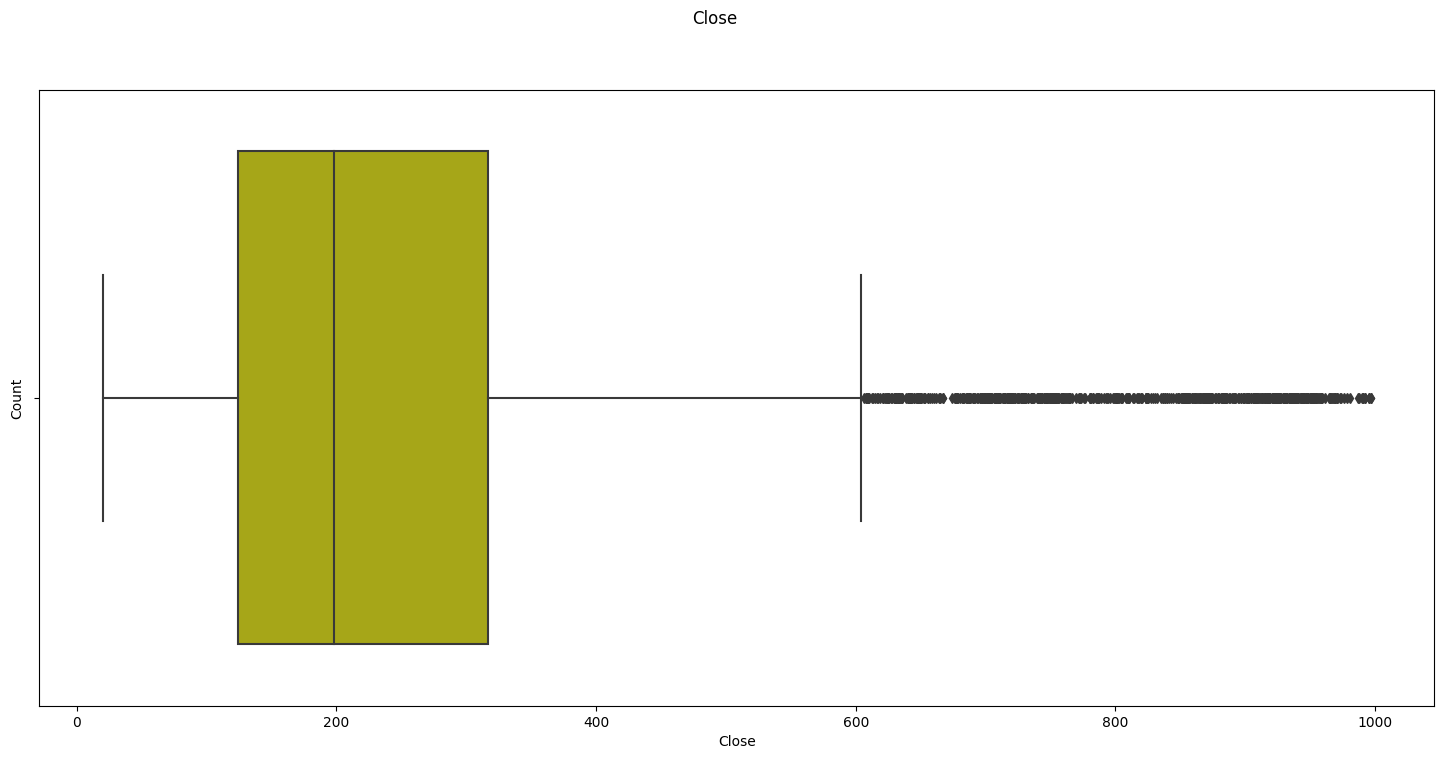

In [166]:
plt.figure(figsize=(18,8))
sns.boxplot(data=Company_stock_prices, x='Close', color='#bebe00')
plt.ylabel('Count')
plt.suptitle('Close')

#### Line Plot
- We can create a line plot of the closing stock prices over time using the matplotlib library.

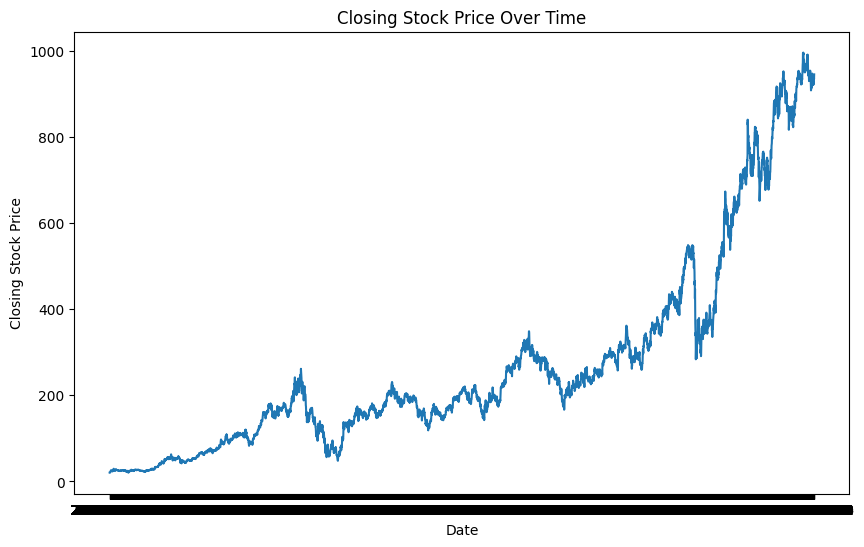

In [147]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=Company_stock_prices)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

# grid line for opening price over time

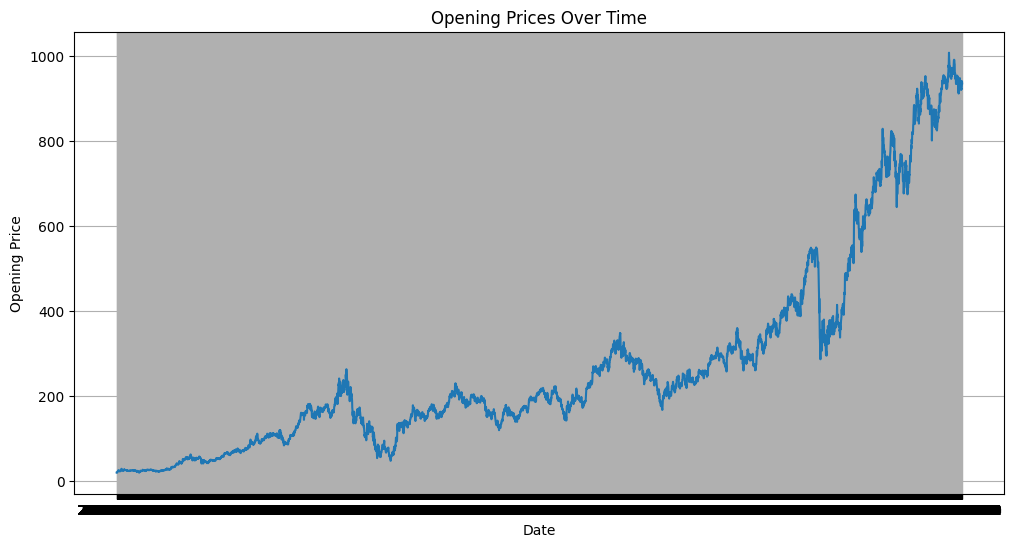

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(Company_stock_prices['Date'], Company_stock_prices['Open'])
plt.title('Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.grid()
plt.show()

#### From the plot, we can see that the closing and opening stock prices have increased over time, with some fluctuations.




# Scatter plot of Open vs. Close prices

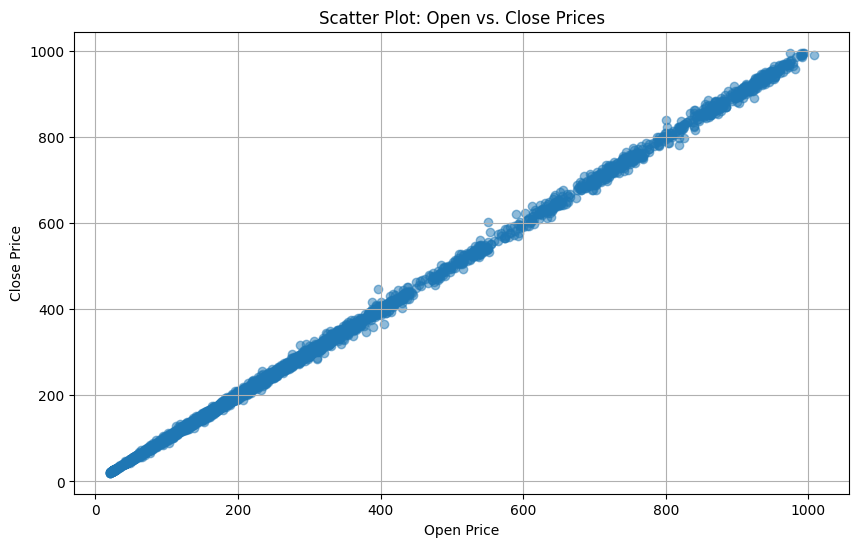

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(Company_stock_prices['Open'], Company_stock_prices['Close'], alpha=0.5)
plt.title('Scatter Plot: Open vs. Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid()
plt.show()

#### The scatter plot of Open vs. Close prices shows a relatively strong positive correlation, suggesting that the closing price is often close to the opening price on the same day.


# Box Plot
### We can create a box plot of the closing stock prices by year using the seaborn library.

## **Converting 'DATE' column datetime format**

In [150]:
Company_stock_prices['Date'] = pd.to_datetime(Company_stock_prices['Date'],format='%Y-%m-%d')

In [151]:
Company_stock_prices["Date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 5341 entries, 0 to 5375
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
5341 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 83.5 KB


In [152]:
Company_stock_prices["MONTH"] = Company_stock_prices.Date.dt.strftime("%b") # month extraction
Company_stock_prices["YEAR"] = Company_stock_prices.Date.dt.strftime("%Y") # year extraction
Company_stock_prices["YEAR-MONTH"] = Company_stock_prices.Date.dt.strftime("%Y-%m")
Company_stock_prices_bak = Company_stock_prices.copy()
Company_stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume,MONTH,YEAR,YEAR-MONTH
0,2002-04-29,20.363636,20.363636,20.363636,20.363636,4.913608,534143.0,Apr,2002,2002-04
1,2002-04-30,20.463634,20.463634,20.463634,20.463634,4.937736,152739.0,Apr,2002,2002-04
2,2002-05-01,20.463634,20.463634,20.463634,20.463634,4.937736,0.0,May,2002,2002-05
3,2002-05-02,20.354546,20.354546,20.354546,20.354546,4.911414,732357.0,May,2002,2002-05
4,2002-05-03,20.909090,20.909090,20.909090,20.909090,5.045221,254467.0,May,2002,2002-05
...,...,...,...,...,...,...,...,...,...,...
5371,2023-11-24,922.250000,930.599976,920.349976,929.150024,929.150024,906155.0,Nov,2023,2023-11
5372,2023-11-28,927.549988,931.450012,921.650024,926.049988,926.049988,462627.0,Nov,2023,2023-11
5373,2023-11-29,928.549988,941.150024,926.150024,939.349976,939.349976,282711.0,Nov,2023,2023-11
5374,2023-11-30,940.950012,941.049988,928.650024,935.200012,935.200012,568059.0,Nov,2023,2023-11


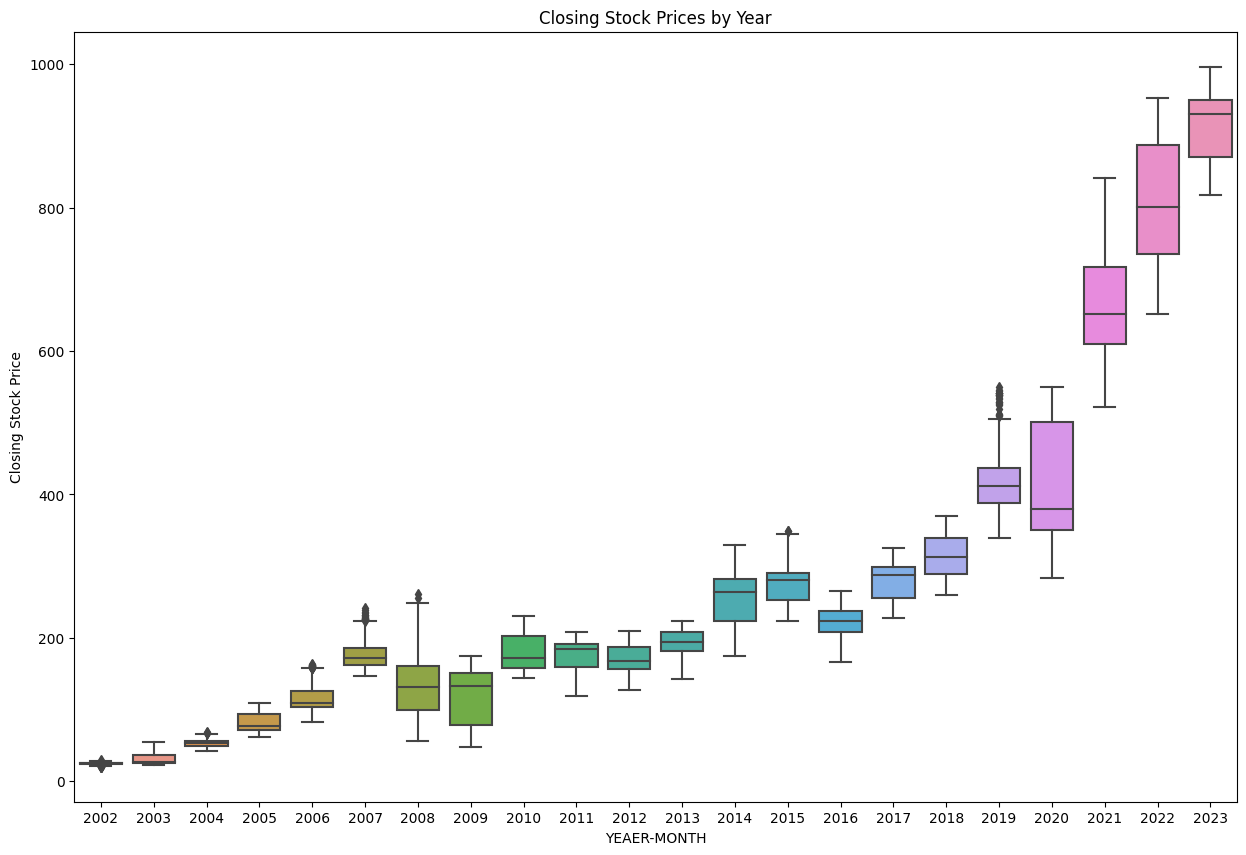

In [172]:
Company_stock_prices['YEAR-MONTH'] = Company_stock_prices['Date'].dt.year
plt.figure(figsize=(15,10))
sns.boxplot(x='YEAR-MONTH', y='Close', data=Company_stock_prices)
plt.title('Closing Stock Prices by Year')
plt.xlabel('YEAER-MONTH')
plt.ylabel('Closing Stock Price')
plt.show()

- From the plot, we can see that the closing stock prices have generally increased over the years, with some outliers.

### Box plots for High, Low, and Volume

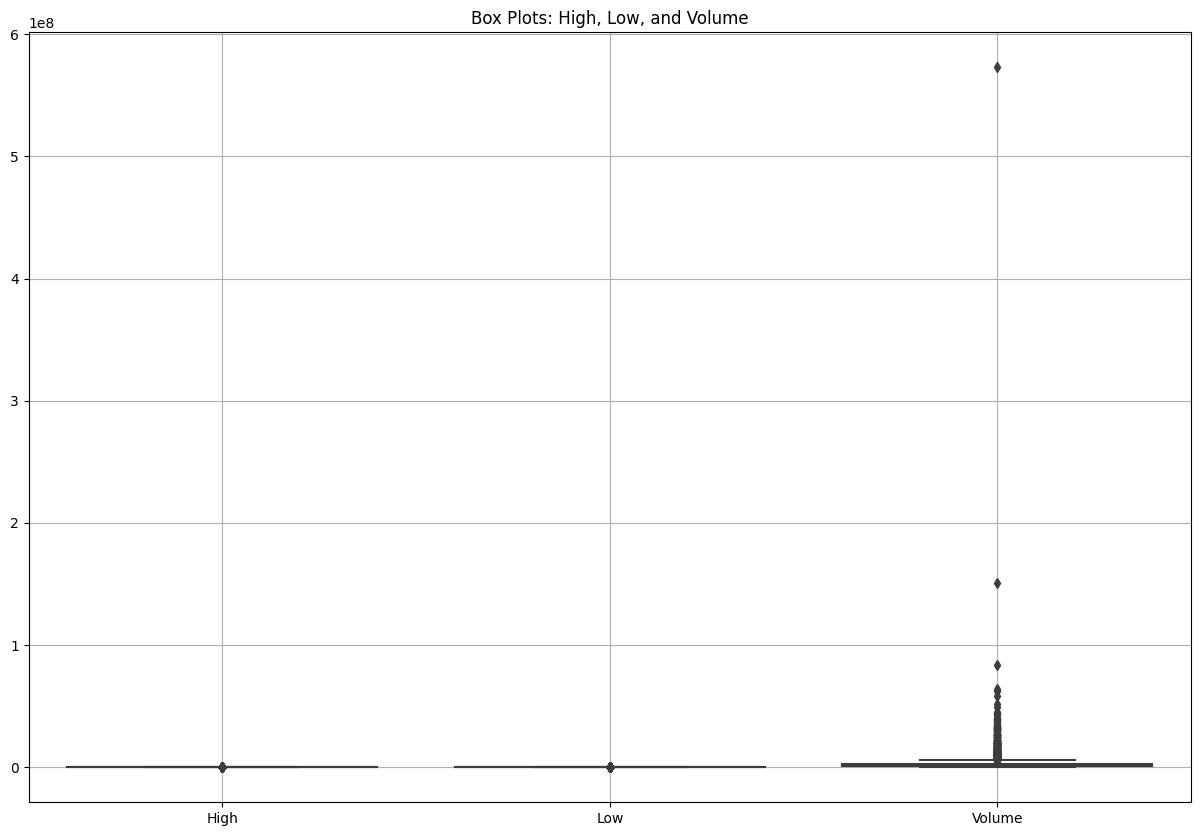

In [154]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Company_stock_prices[['High', 'Low', 'Volume']])
plt.title('Box Plots: High, Low, and Volume')
plt.grid()
plt.show()

#### The box plots for High, Low, and Volume provide insights into the spread and distribution of these variables.
#### High and Low prices have varying levels of volatility, while Volume varies over time,

### Box plots for High, Low, and Adj Close

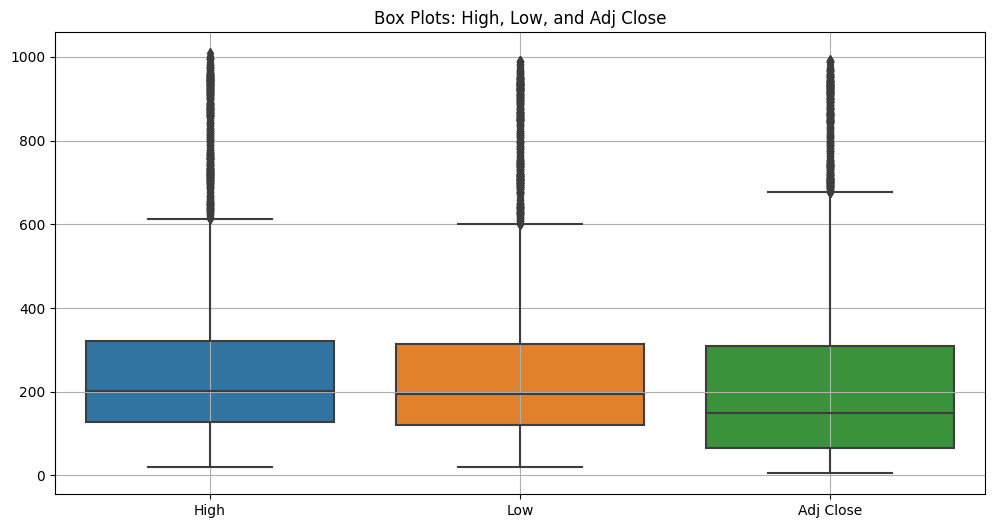

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Company_stock_prices[['High', 'Low', 'Adj Close']])
plt.title('Box Plots: High, Low, and Adj Close')
plt.grid()
plt.show()

#### The box plots for High, Low, and Adj Close provide insights into the spread and distribution of these variables. High and Low prices show varying levels of volatility, while Adj Close prices have a more stable distribution.


## Heatmap
- We can create a heatmap to visualize the correlation between the stock prices using the seaborn library.

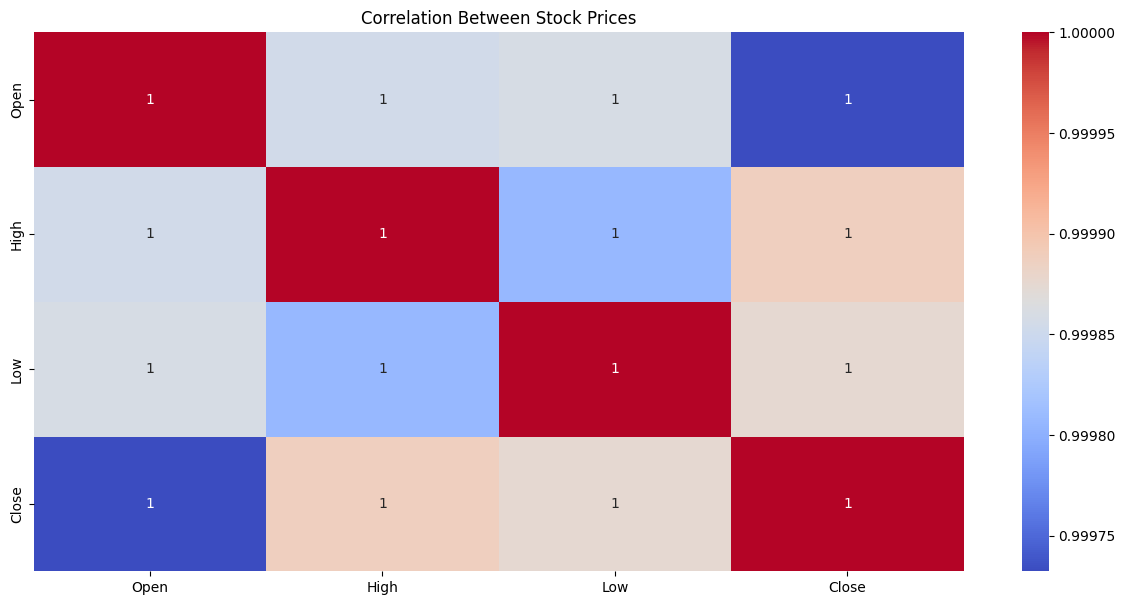

In [156]:
corr = Company_stock_prices[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

- From the heatmap, we can see that the opening and closing prices have a strong positive correlation, while the low and high prices have a weaker positive correlation.

- We can start by visualizing the distribution of the target variable, which in this case is the closing stock price. We can use a histogram to visualize the distribution.

## Histogram

### Histogram of Adj Close prices

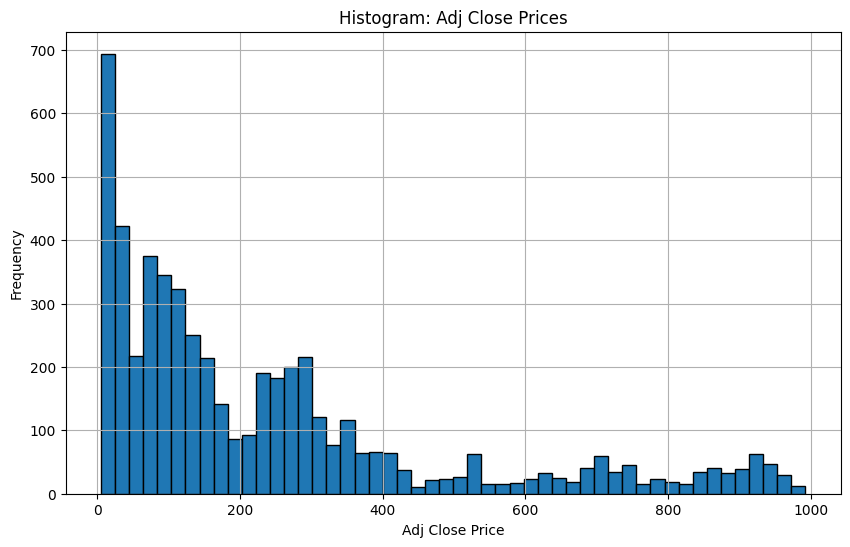

In [157]:
plt.figure(figsize=(10, 6))
plt.hist(Company_stock_prices['Adj Close'], bins=50, edgecolor='k')
plt.title('Histogram: Adj Close Prices')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### The histogram of Adj Close prices demonstrates the distribution of adjusted closing prices, and also showing that most of the prices are within a certain range.


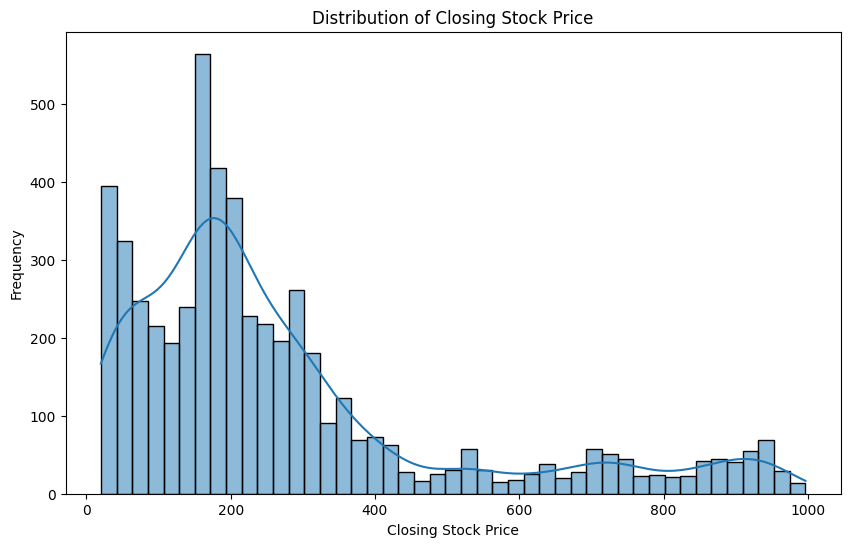

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(Company_stock_prices['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

#### the histogram of the closing stock price allows us to understand the central tendencies and spread of closing prices, as well as the overall shape and characteristics of the distribution.

## Histograms for 'High', 'Low', and 'Volume'

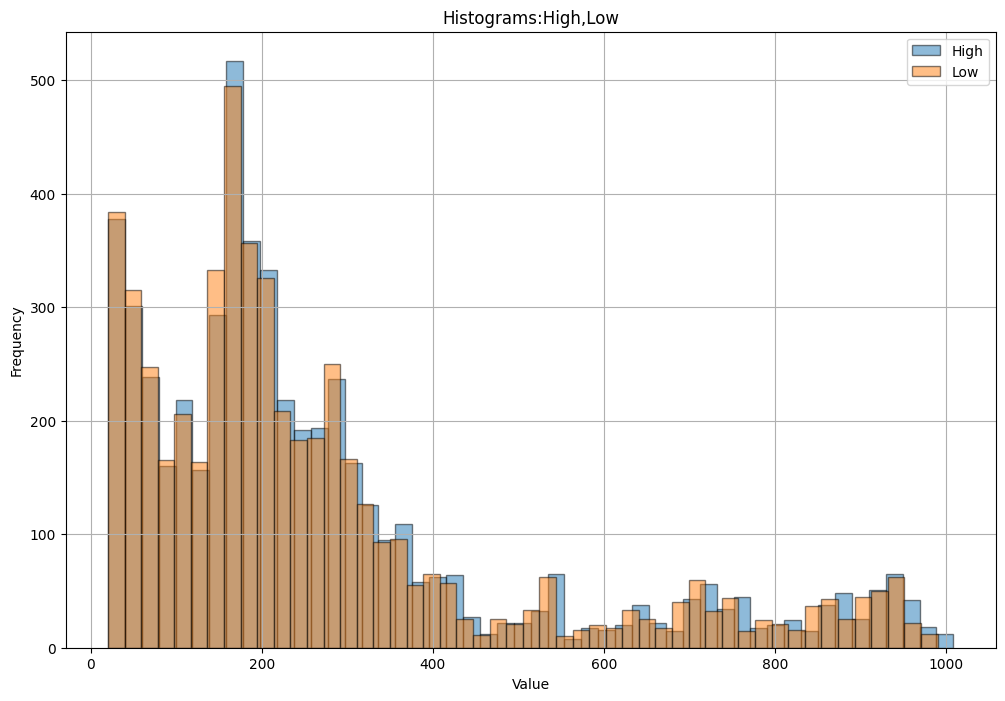

In [159]:
plt.figure(figsize=(12, 8))
plt.hist(Company_stock_prices['High'], bins=50, alpha=0.5, label='High', edgecolor='k')
plt.hist(Company_stock_prices['Low'], bins=50, alpha=0.5, label='Low', edgecolor='k')
#plt.hist(Company_stock_prices['Volume'], bins=50, alpha=0.5, label='Volume', edgecolor='k')
plt.title('Histograms:High,Low')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

#### The histograms for 'High' and 'Low' prices show the distribution of daily high and low prices. Both histograms have long tails on the right side, it indicating that there are occasional extreme price values.

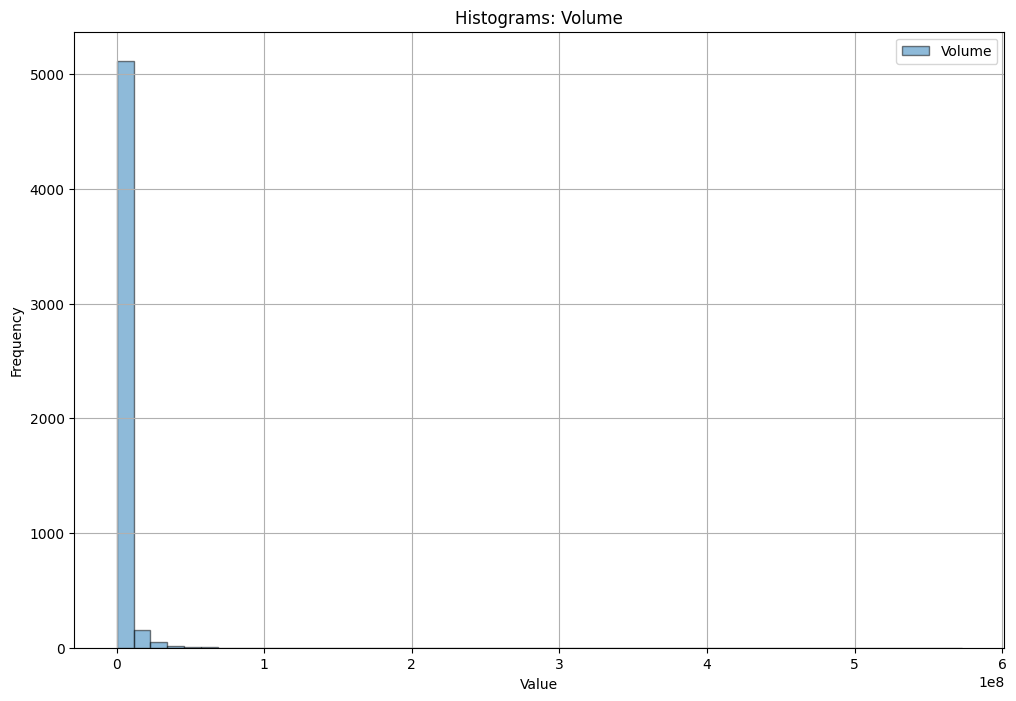

In [160]:
plt.figure(figsize=(12, 8))
plt.hist(Company_stock_prices['Volume'], bins=50, alpha=0.5, label='Volume', edgecolor='k')
plt.title('Histograms: Volume')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

#### #The histogram for 'Volume' shows the distribution of daily trading volumes. It indicates that the majority of trading days have a relatively low volume, while there are occasional spikes in trading activity.


#### Line Chart

- To visualize the daily returns, we can create a line chart using the pandas library. The line chart will show the percentage change in price from one day to the next.

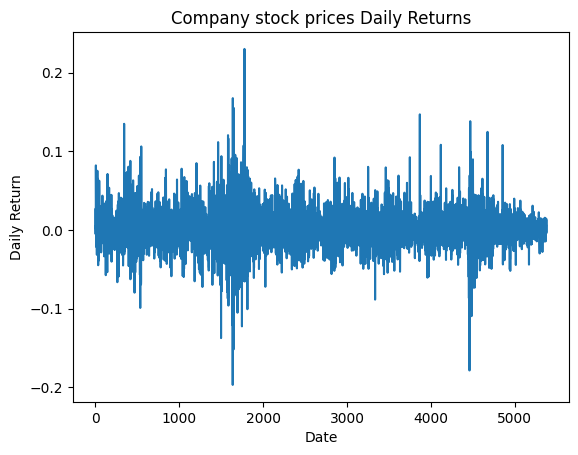

In [161]:
daily_returns = Company_stock_prices['Close'].pct_change()
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Company stock prices Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

#### Combination Chart
- We can use a combination chart to visualize the stock prices with the volume traded.

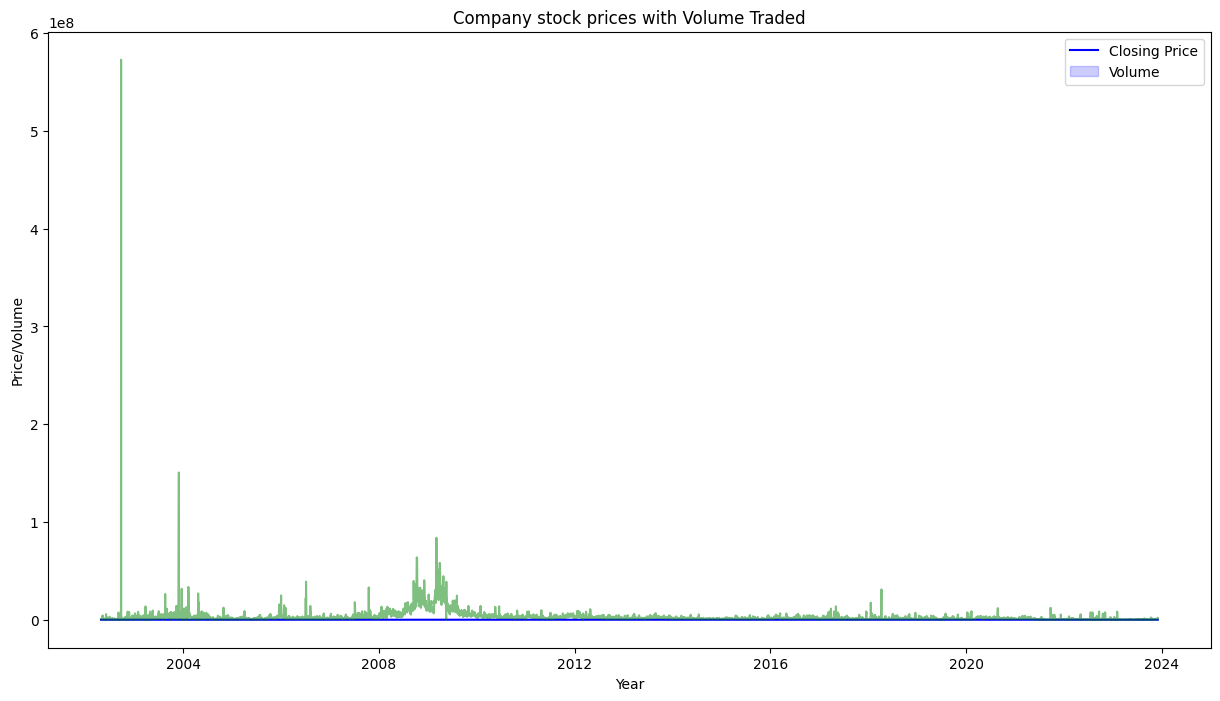

In [162]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Close', data=Company_stock_prices, color='b')
sns.lineplot(x='Date', y='Volume', data=Company_stock_prices, color='g', alpha=0.5)
plt.title('Company stock prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()

## We can also use a histogram to visualize the daily returns.

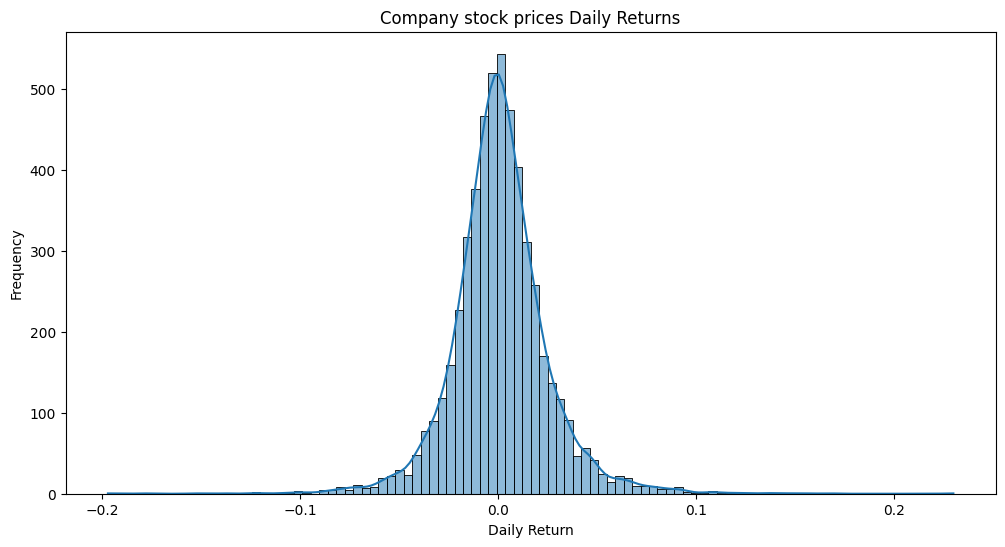

In [163]:
plt.figure(figsize=(12,6))
sns.histplot(Company_stock_prices['Close'].pct_change().dropna(), bins=100, kde=True)
plt.title('Company stock prices Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

####date and close # grid line for closing price over time

### Conclusion

- Exploratory Data Analysis (EDA) is an essential step in data science projects, and it provides a better understanding of the underlying patterns and relationships in the data. Here we performed EDA on the Company stock prices dataset using Python.

+ We started by loading the dataset and exploring it to understand its structure and contents.

- After that, we visualized the data using various charts, such as line plots, heat maps, and histograms. We visualized the stock prices, returns, and trading volumes of the Company stock pricescompanies over time.

+ Overall, the visualizations showed that the Company stock prices index has steadily grown over time, with some periods of volatility. The returns of individual companies have also varied, with some outperforming the index, and others underperforming. Additionally, we observed a correlation between the trading volumes and stock prices of the companies.

- EDA provides valuable insights into the data, and the visualizations help to communicate these insights effectively. By performing EDA, we can identify trends, patterns, and relationships that may not be immediately apparent from the data. This knowledge can then be used to inform further analysis and decision-making.

### Thank You!